<a href="https://colab.research.google.com/github/msmsd778/non-linear-regression/blob/main/Non_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear (As we had before)

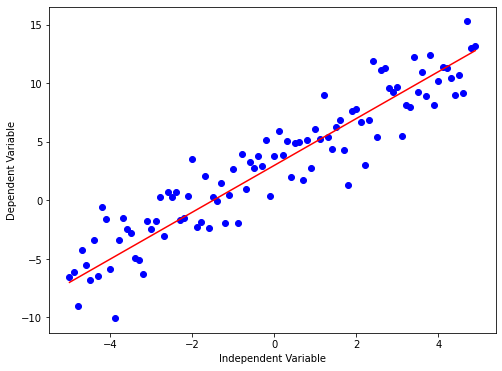

In [13]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*(x) + 3  #y = ax + b
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.figure(figsize=(8,6))
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Cubic

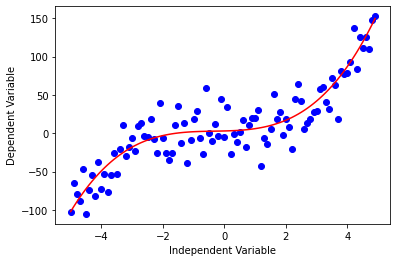

In [18]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3  #y = ax^3 + bx^2 + cx + d
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Quadratic

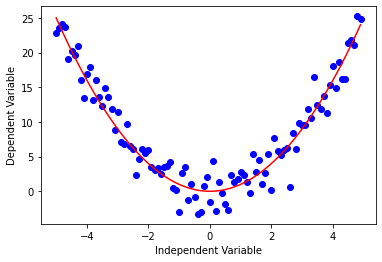

In [19]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2) #y = x^2
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Exponential

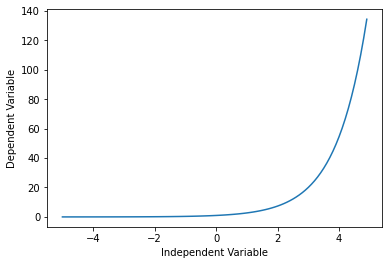

In [33]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.exp(x) #y = a +  b(e^x) | y = a +  b(c^x)
plt.plot(x, y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Logarithmic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


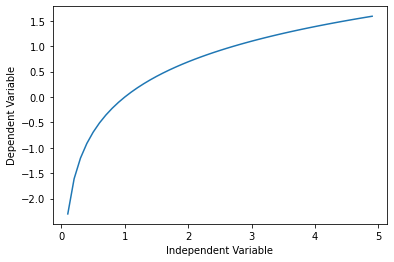

In [35]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.log(x)  #y = log(x)

plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Sigmoidal/Logistic

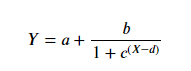

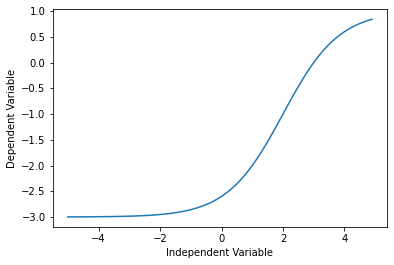

In [37]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1 - 4/(1+np.power(3, x-2))
plt.plot(x,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Non-Linear Regression example

In [41]:
import numpy as np
import pandas as pd

!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
df = pd.read_csv("china_gdp.csv")
df.head(10)

2021-08-04 10:09:24 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10
5  1965  6.970915e+10
6  1966  7.587943e+10
7  1967  7.205703e+10
8  1968  6.999350e+10
9  1969  7.871882e+10

# Plotting the Dataset

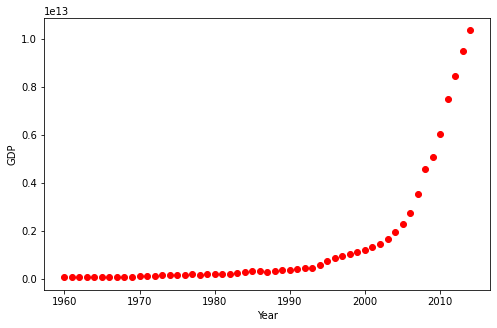

In [46]:
plt.figure(figsize=(8,5))
x_data = df["Year"].values
y_data = df["Value"].values
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Choosing a model

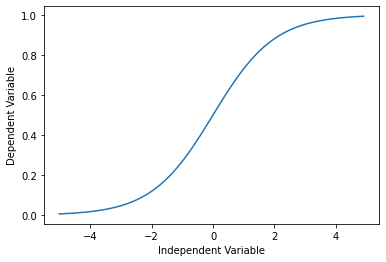

In [47]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1.0 / (1.0 + np.exp(-x))
plt.plot(x,y)
plt.xlabel("Independent Variable")
plt.ylabel('Dependent Variable')
plt.show()

The formula for the logistic function is the following:

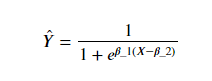

ùõΩ_1 : Controls the curve's steepness,

ùõΩ_2: Slides the curve on the x-axis.

# Building The Model

In [56]:
def sigmoid(x, Beta_1, Beta_2):
  y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
  return y

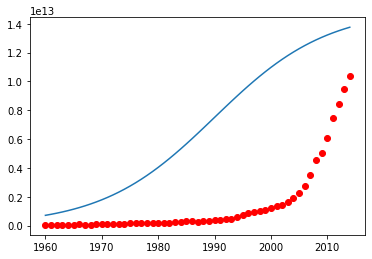

In [57]:
beta_1 = 0.10
beta_2 = 1990.0

y_pred = sigmoid(x_data, beta_1, beta_2)

plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

normalize our x and y:

In [64]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [67]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.453017, beta_2 = 0.997207


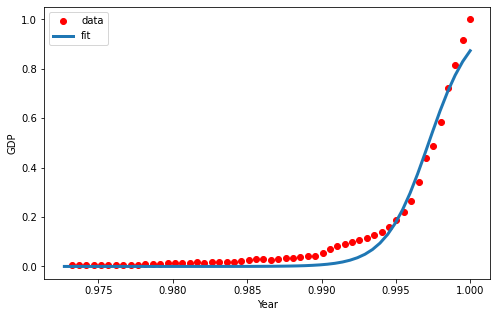

In [73]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Accuracy of the model

In [76]:
from sklearn.metrics import r2_score
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)
y_hat = sigmoid(test_x, *popt)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat, test_y))

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97
